<a href="https://colab.research.google.com/github/anish3565/QML/blob/main/Quantum_SVM/PD_using_QSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit-algorithms
!pip install qiskit_machine_learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_algorithms.state_fidelities import ComputeUncompute

In [ ]:
# 📌 1️⃣ Load Parkinson’s Dataset
url = "https://raw.githubusercontent.com/SayamAlt/Parkinson-s-Disease-Detection/refs/heads/main/parkinsons.csv"
df = pd.read_csv(url)

In [ ]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


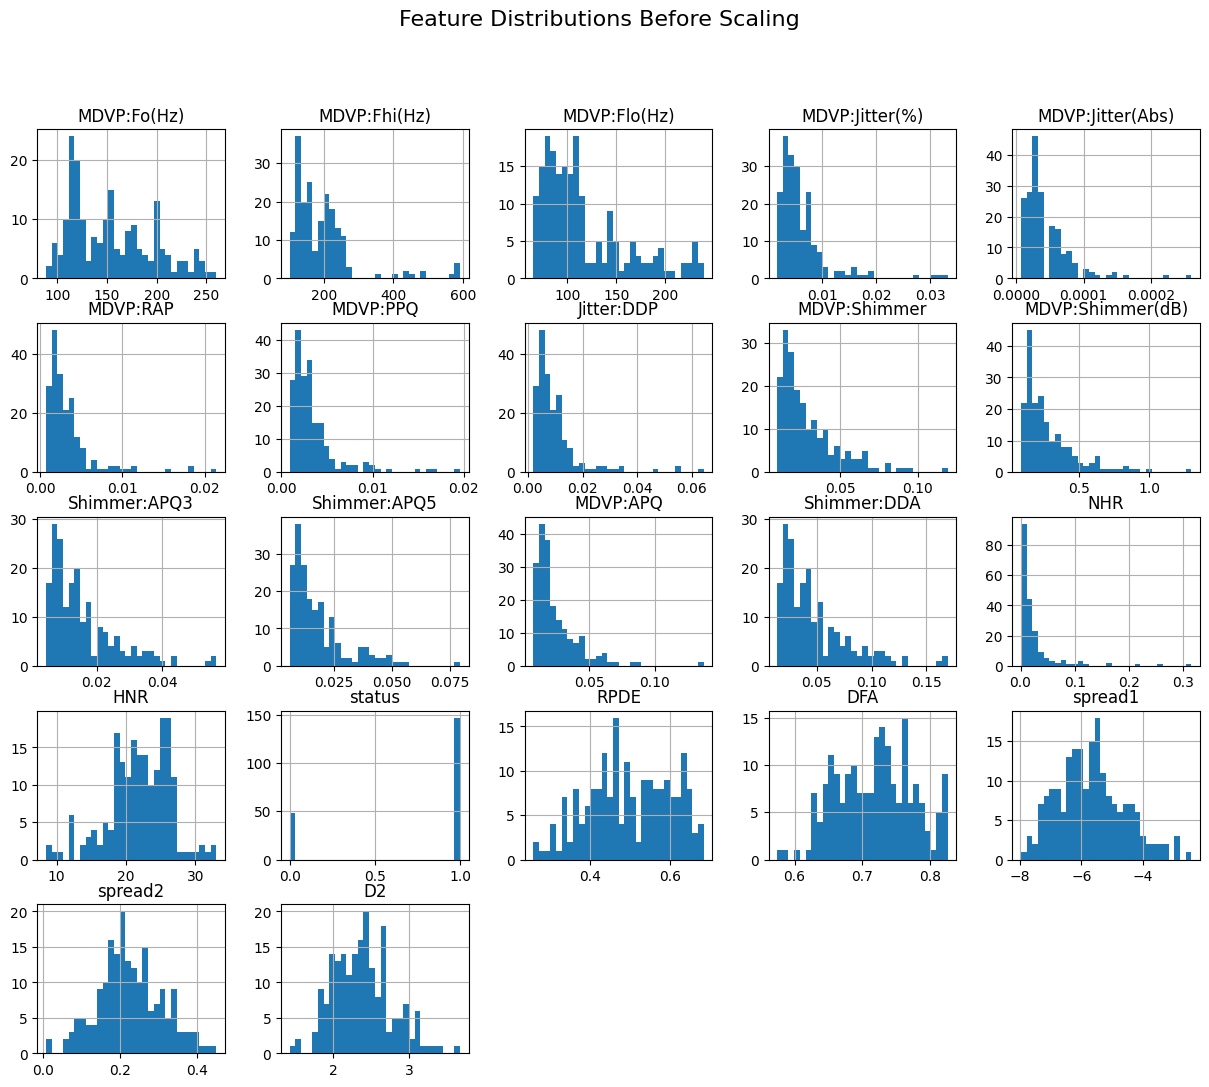

In [ ]:
def plot_feature_distributions(df):
    """ Visualize feature distributions before scaling """
    df.iloc[:, 1:-1].hist(figsize=(15, 12), bins=30)
    plt.suptitle("Feature Distributions Before Scaling", fontsize=16)
    plt.show()

plot_feature_distributions(df)

In [ ]:
# 📌 2️⃣ Preprocessing: Extract Features & Labels
X = df.drop(columns=["name", "status"])  # Remove 'name' column, 'status' is the label
y = df["status"]  # Target variable (1 = Parkinson's, 0 = Healthy)

# Display dataset info
print("\n📊 Data Shape (samples, features):", X.shape)
print("\n🔹 First 5 rows of the dataset:\n", df.head())


📊 Data Shape (samples, features): (195, 22)

🔹 First 5 rows of the dataset:
              name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimm

In [ ]:
# 📌 2️⃣ Preprocessing & Splitting Data
def preprocess_data(X, y, training_size, test_size, n_features):
    """ Preprocess data using Standardization, PCA, and Scaling """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Standardization (zero mean, unit variance)
    std_scaler = StandardScaler().fit(X_train)
    X_train = std_scaler.transform(X_train)
    X_test = std_scaler.transform(X_test)

    # PCA for dimensionality reduction
    pca = PCA(n_components=n_features).fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

    # Visualizing PCA explained variance
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, n_features + 1), pca.explained_variance_ratio_, alpha=0.6)
    plt.xlabel("Principal Components")
    plt.ylabel("Explained Variance")
    plt.title("Variance Captured by Each Principal Component")
    plt.show()

    # MinMax Scaling (-1 to 1 for quantum processing)
    minmax_scaler = MinMaxScaler(feature_range=(-1, 1)).fit(np.vstack((X_train, X_test)))
    X_train = minmax_scaler.transform(X_train)
    X_test = minmax_scaler.transform(X_test)

    return X_train[:training_size], y_train[:training_size], X_test[:test_size], y_test[:test_size]

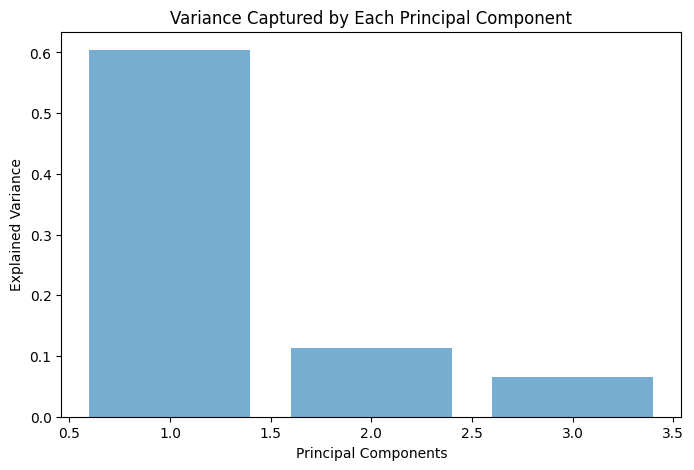

In [ ]:
# Choose 3 features for quantum processing (adjustable)
n_features = 3
train_data, train_labels, test_data, test_labels = preprocess_data(X, y, training_size=120, test_size=20, n_features=n_features)

In [ ]:
test_labels

,status
138,1
16,1
155,1
96,1
68,1
153,1
55,1
15,1
112,1
111,1


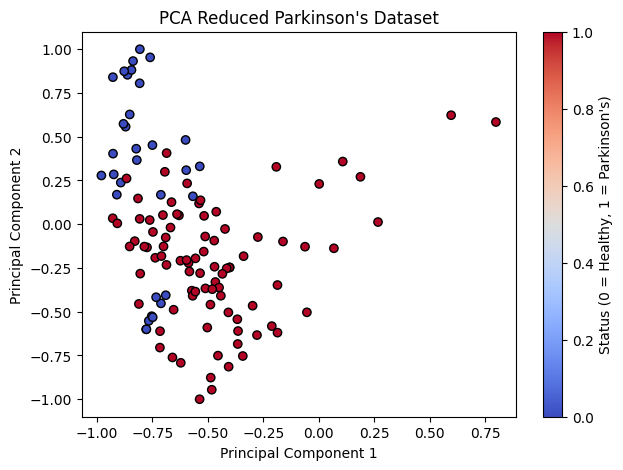

In [ ]:
# Visualizing PCA reduced data
plt.figure(figsize=(7, 5))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap='coolwarm', edgecolors='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Reduced Parkinson's Dataset")
plt.colorbar(label="Status (0 = Healthy, 1 = Parkinson's)")
plt.show()

In [ ]:
# 📌 3️⃣ Quantum Feature Mapping & Kernel Setup
feature_map = ZZFeatureMap(n_features)
print("\nQuantum Feature Map Circuit:")
print(feature_map.draw(output='text'))


Quantum Feature Map Circuit:
     ┌───────────────────────────────┐
q_0: ┤0                              ├
     │                               │
q_1: ┤1 ZZFeatureMap(x[0],x[1],x[2]) ├
     │                               │
q_2: ┤2                              ├
     └───────────────────────────────┘


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=6c5ce40a787ca7a05ea9d09c43fc0a23c82b3b779b69355ec36c4d17b465dd57
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


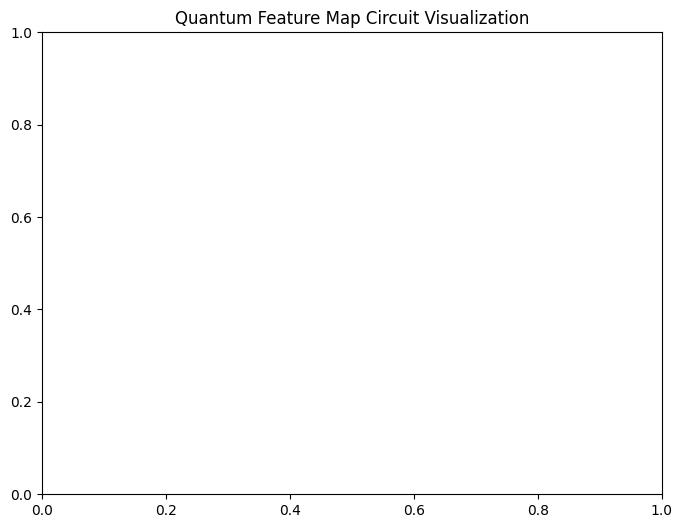

In [ ]:
# Visualizing Quantum Feature Map
from qiskit.visualization import circuit_drawer

plt.figure(figsize=(8, 6))
feature_map.decompose().draw(output='mpl')  # Decomposed circuit visualization
plt.title("Quantum Feature Map Circuit Visualization")
plt.show()

In [ ]:
fidelity = ComputeUncompute(sampler=Sampler())
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

<ipython-input-12-0924a38a621b>:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  fidelity = ComputeUncompute(sampler=Sampler())


In [ ]:
# 📌 4️⃣ Train & Evaluate QSVC
qsvc = QSVC(quantum_kernel=quantum_kernel, decision_function_shape='ovr')
qsvc.fit(train_data, train_labels)

print(f'\n✅ Training Accuracy: {qsvc.score(train_data, train_labels):.2f}')
print(f'✅ Test Accuracy: {qsvc.score(test_data, test_labels):.2f}')


✅ Training Accuracy: 0.87
✅ Test Accuracy: 0.85



`ZZFeatureMap(n_features)`

- This is a quantum feature map that encodes classical data into quantum states using entangling ZZ interactions.
- It constructs a parameterized quantum circuit where each feature is encoded as a rotation angle in qubits.
- The entanglement between qubits helps capture non-linear relationships.

`ComputeUncompute(sampler=Sampler())`

- This is used to measure the fidelity between quantum states.
- It computes how similar two quantum states are, which forms the basis of the quantum kernel.
- Instead of explicitly computing the inner product of quantum states, it uses an efficient method of preparation, running, and measuring.

`FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)`

- This builds the final quantum kernel function using the ZZFeatureMap and state fidelity measurements.
- It measures similarity between data points in quantum Hilbert space.